## Exploring Mechanism of Action with Knowledge Graph
### With `Only Protein Node` Types as Intermediary Nodes
- Examples with Ondansetron and BPD

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import matplotlib.patches as mpatches

import pickle

from MOA_functions import *

In [2]:
# node color assigned per node type for the specific use case with only protein as intermediary nodes
node_color_dict_ptn_specific= node_color_dict_ptn_specific_info()

node_color_df = pd.DataFrame(node_color_dict_ptn_specific)
node_color_df

,node_type,color
0,gene/protein,#16AEEF
1,drug,#946BE1
3,disease,#5DC264


In [3]:
kg = pd.read_parquet('../Interactive_Webapp/2024_reference_tables/kg.parquet')

In [4]:
# Select the nodes of interest for testing
dz_name = 'BPD_OLD_Baby'
med_name = 'Ondansetron, Oral'
dz_id_list = ['19091']
med_id = 'DB00904'

In [5]:
# Select only protein interactions as the intermediary nodes
sel_relation = ['protein_protein']
sel_kg = kg[kg['relation'].isin(sel_relation)]

# Select the disease of interest and its connection to proteins
dease_kg = kg[kg['relation']=='disease_protein'][kg['x_id'].isin(dz_id_list)]
dease_kg_y = kg[kg['relation']=='disease_protein'][kg['y_id'].isin(dz_id_list)]

# Select the drug of interest and its connection to proteins
drug_kg = kg[kg['relation']=='drug_protein'][kg['x_id']==med_id]
drug_kg_y = kg[kg['relation']=='drug_protein'][kg['y_id']==med_id]

final_kg = pd.concat([sel_kg,dease_kg,dease_kg_y,drug_kg,drug_kg_y])
final_kg_final = final_kg.copy()

/tmp/ipykernel_4084335/2910085481.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dease_kg = kg[kg['relation']=='disease_protein'][kg['x_id'].isin(dz_id_list)]
/tmp/ipykernel_4084335/2910085481.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dease_kg_y = kg[kg['relation']=='disease_protein'][kg['y_id'].isin(dz_id_list)]
/tmp/ipykernel_4084335/2910085481.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_kg = kg[kg['relation']=='drug_protein'][kg['x_id']==med_id]
/tmp/ipykernel_4084335/2910085481.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_kg_y = kg[kg['relation']=='drug_protein'][kg['y_id']==med_id]


In [6]:
node_list = make_node_list(final_kg_final,node_color_df)
edge_list = make_edge_list(final_kg_final)
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

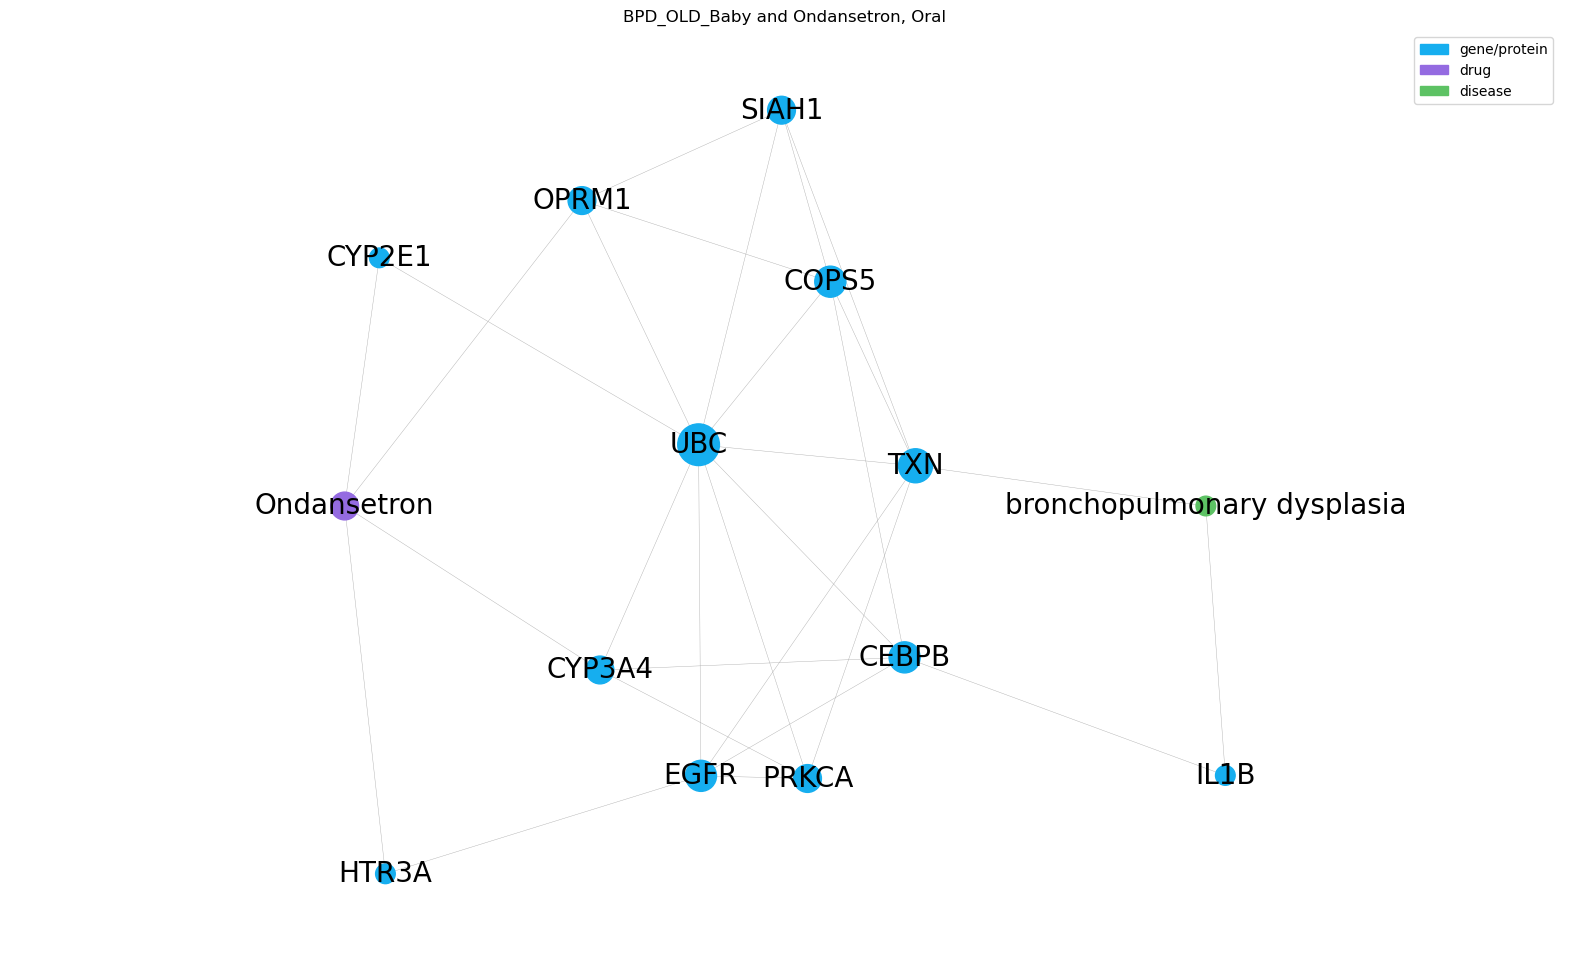

In [7]:
# Generate a shortest path subgraph between Ondansetron and BPD with only protein nodes as intermediary nodes
# The graph is not organized as a circular shape here
T, shortest_paths_dict, num = construct_graph(G,med_id,dz_id_list,dz_name,med_name)
fig = plot_subgraph(T,dz_name,med_name,dz_id_list,med_id,node_color_df)
fig.show()

In [8]:
# Check all shortest paths between Ondansetron and BPD
shortest_paths_dict

{0: ['DB00904', '1576', '1051', '3553', '19091'],
 1: ['DB00904', '1576', '7316', '7295', '19091'],
 2: ['DB00904', '1571', '7316', '7295', '19091'],
 3: ['DB00904', '4988', '7316', '7295', '19091'],
 4: ['DB00904', '1576', '5578', '7295', '19091'],
 5: ['DB00904', '3359', '1956', '7295', '19091'],
 6: ['DB00904', '4988', '10987', '7295', '19091'],
 7: ['DB00904', '4988', '6477', '7295', '19091']}

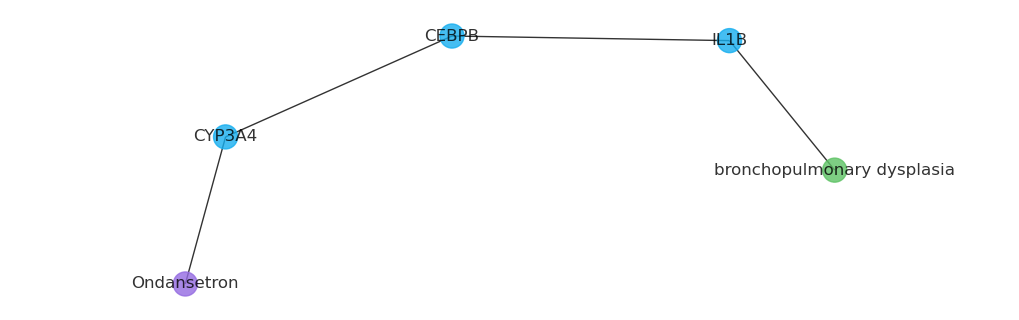

In [9]:
# Check the most important shortest path between Ondansetron and BPD
each_fig = plot_one_shortest_path(G,shortest_paths_dict[0],med_id,dz_id_list)
each_fig.show()

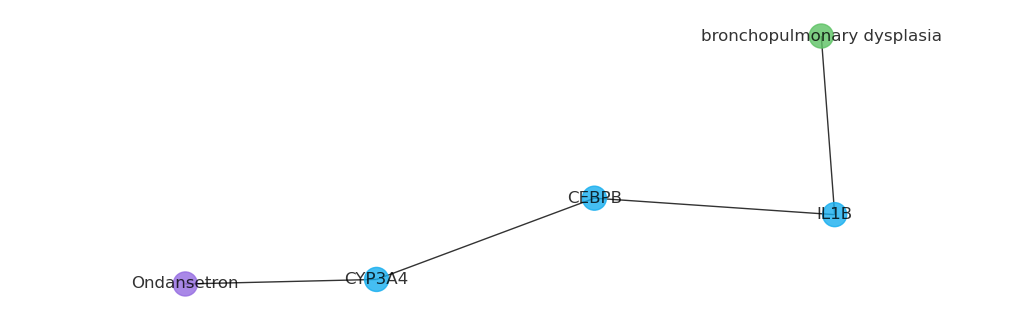

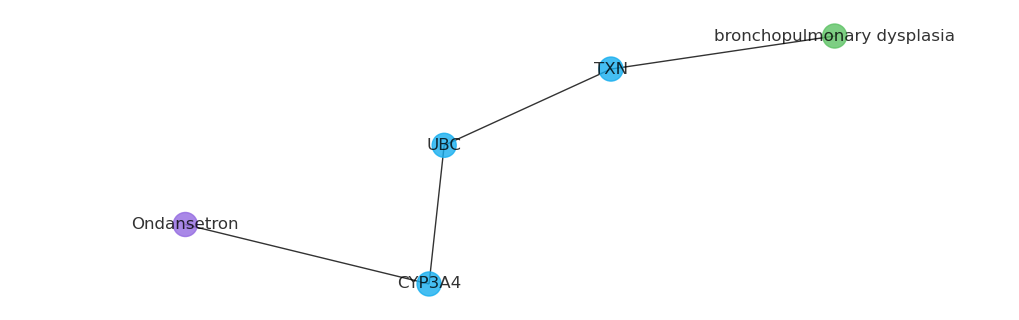

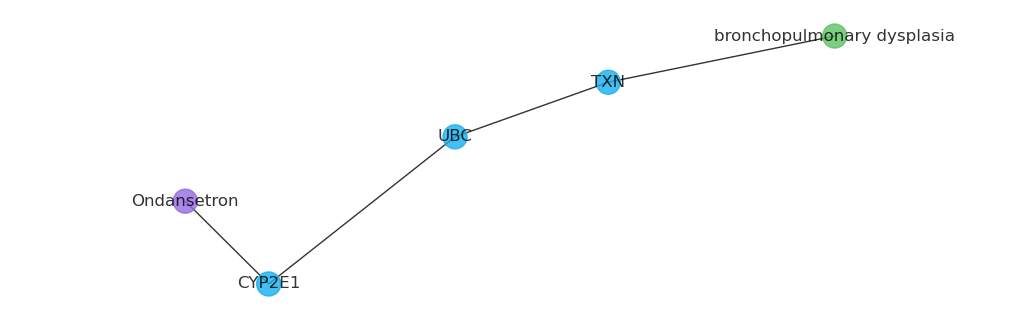

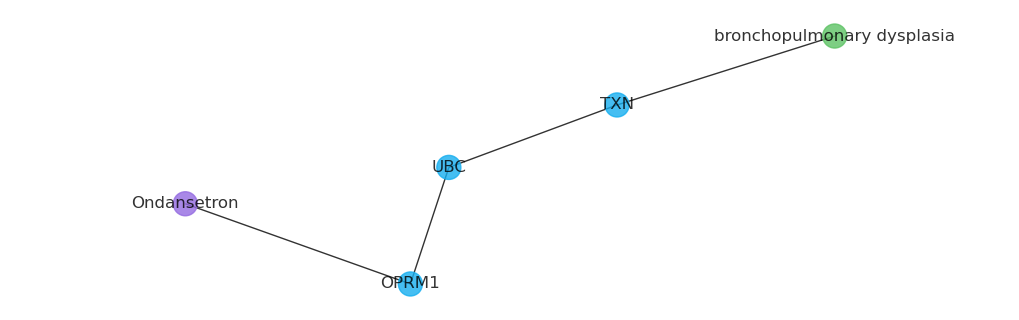

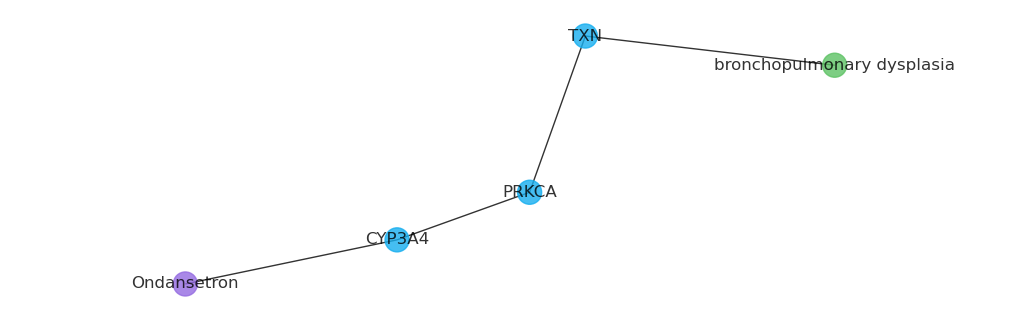

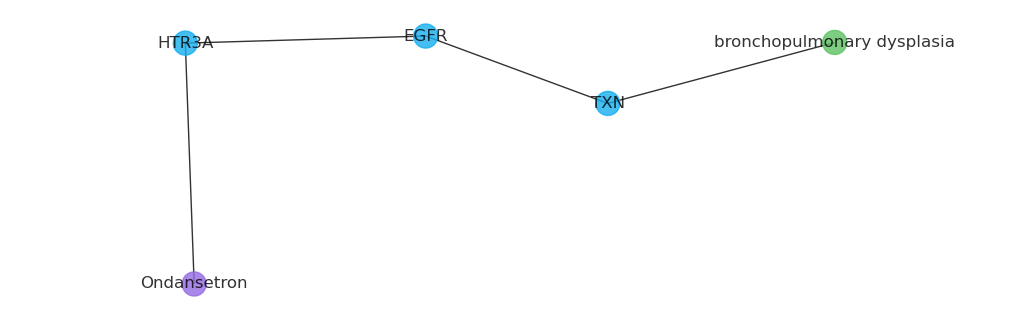

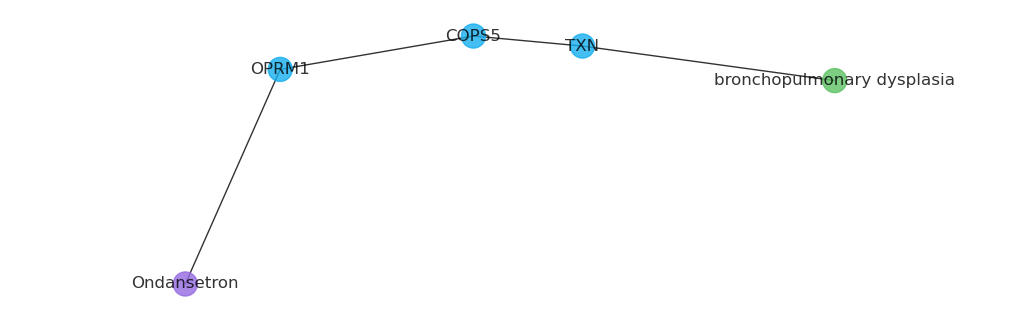

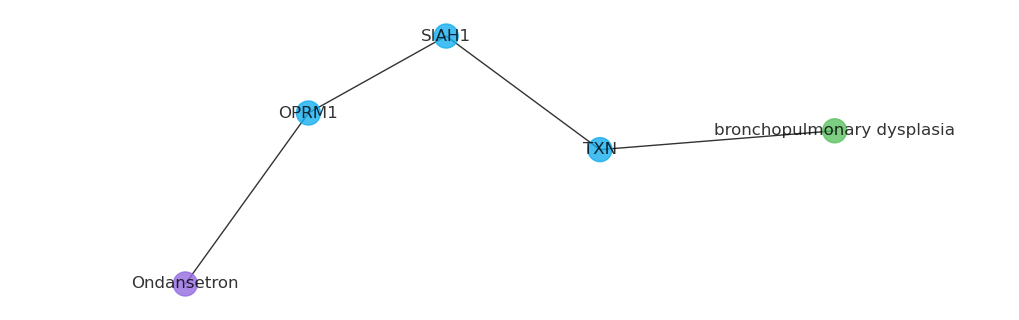

In [10]:
# plot all eight shortest paths between Ondansetron and BPD
plot_shortest_paths(T,shortest_paths_dict,med_id,dz_id_list)